In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from cdt.causality.graph import PC

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [2]:
data = pd.read_csv(r'D:\my work\Causal theory\pisa数据\2022\CY08MSP_STU_QQQ_processed_Official-variables.csv')

In [3]:
file_path = "pc_edgelist_0411v1.txt"
result_path = "pc_causal-graph_0411v1.png"

In [4]:
pc_output = PC().create_graph_from_data(data)

In [5]:
nx.write_edgelist(pc_output, file_path)

In [6]:
def create_and_draw_graph_from_edgelist(file_path):
    G = nx.DiGraph()  # 创建一个有向图
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split(' ', 2)  # 使用空格分割每一行，最多分割成3部分
            if len(parts) == 3:  # 确保行格式正确
                source = parts[0]
                target = parts[1]
                # 这里不处理权重，因为示例中权重都是1，直接添加边
                G.add_edge(source, target)
    
    # 检查图中的节点和边数量
    print("节点数量:", G.number_of_nodes())
    print("边数量:", G.number_of_edges())

    # 生成布局并绘制图
    pos = nx.spring_layout(G, seed=42)  # 使用spring布局, 添加seed参数
    plt.figure(figsize=(15, 10))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10, width=1)
    plt.title("Complete Causal Graph")
    plt.show()

节点数量: 25
边数量: 126


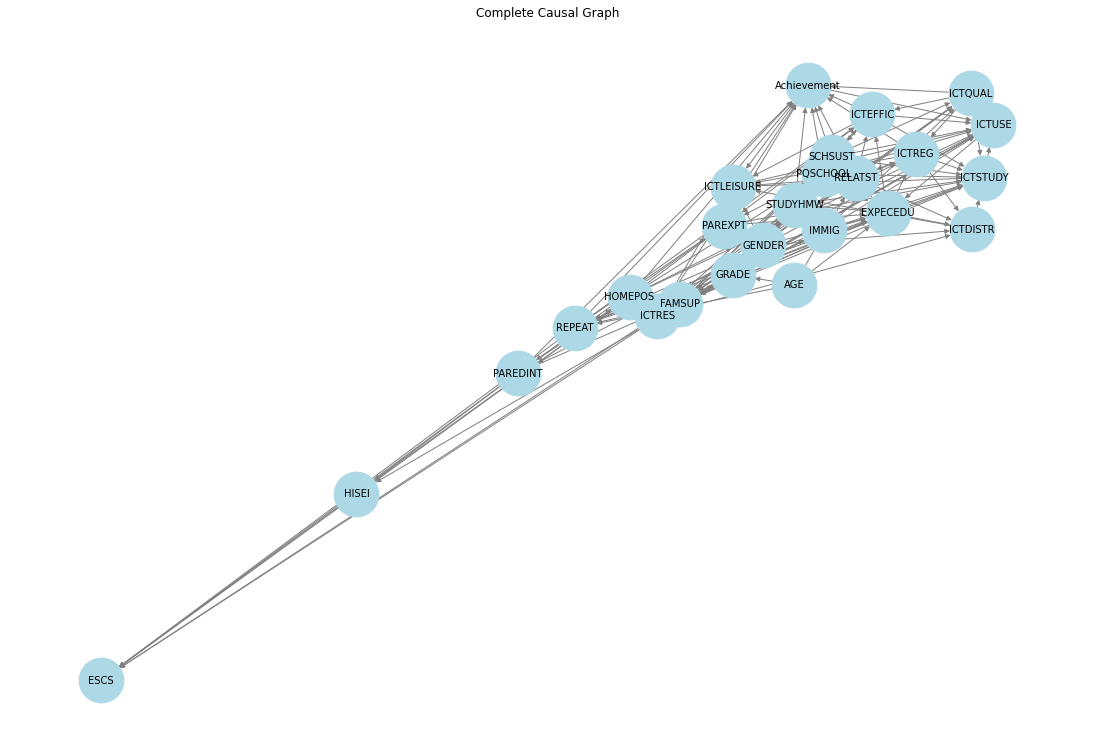

In [7]:
create_and_draw_graph_from_edgelist(file_path)

节点数量: 25
边数量: 126


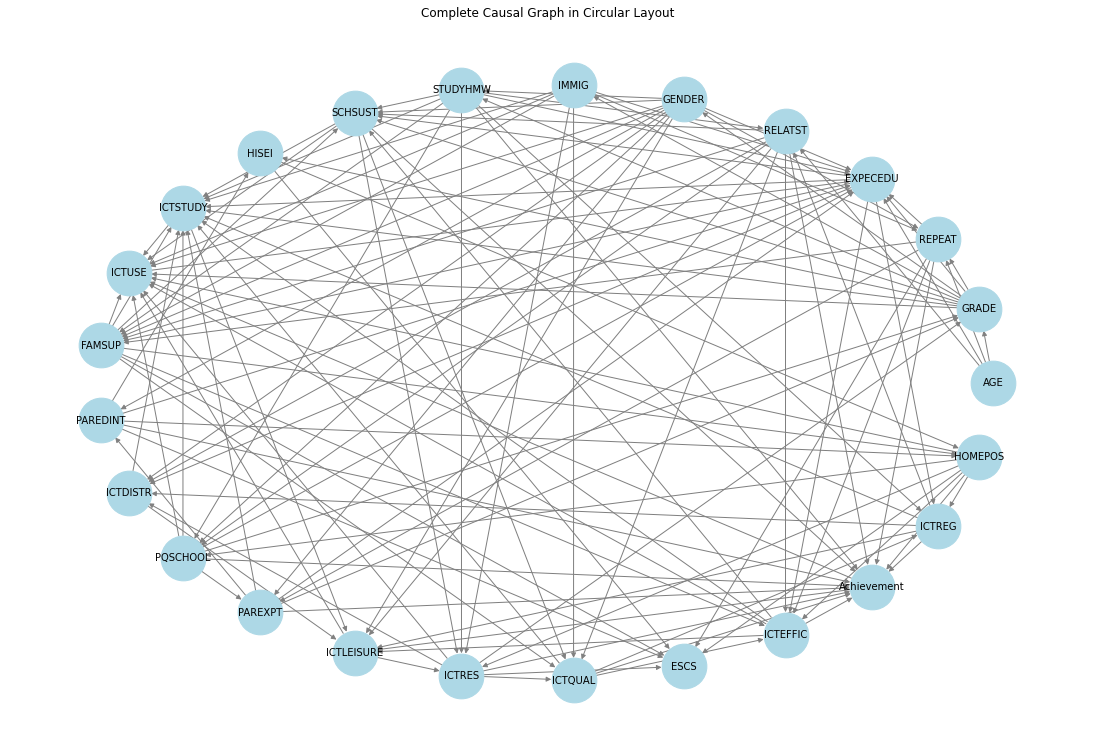

In [8]:
def create_and_draw_graph_from_edgelist_circular(file_path):
    G = nx.DiGraph()  # 创建一个有向图
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split(' ', 2)  # 使用空格分割每一行，最多分割成3部分
            if len(parts) == 3:  # 确保行格式正确
                source = parts[0]
                target = parts[1]
                # 直接添加边，这里忽略权重
                G.add_edge(source, target)
    
    # 检查图中的节点和边数量
    print("节点数量:", G.number_of_nodes())
    print("边数量:", G.number_of_edges())

    # 使用circular_layout生成布局并绘制图
    pos = nx.circular_layout(G)  # 使用circular布局
    plt.figure(figsize=(15, 10))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10, width=1)
    plt.title("Complete Causal Graph in Circular Layout")
    plt.show()


create_and_draw_graph_from_edgelist_circular(file_path)

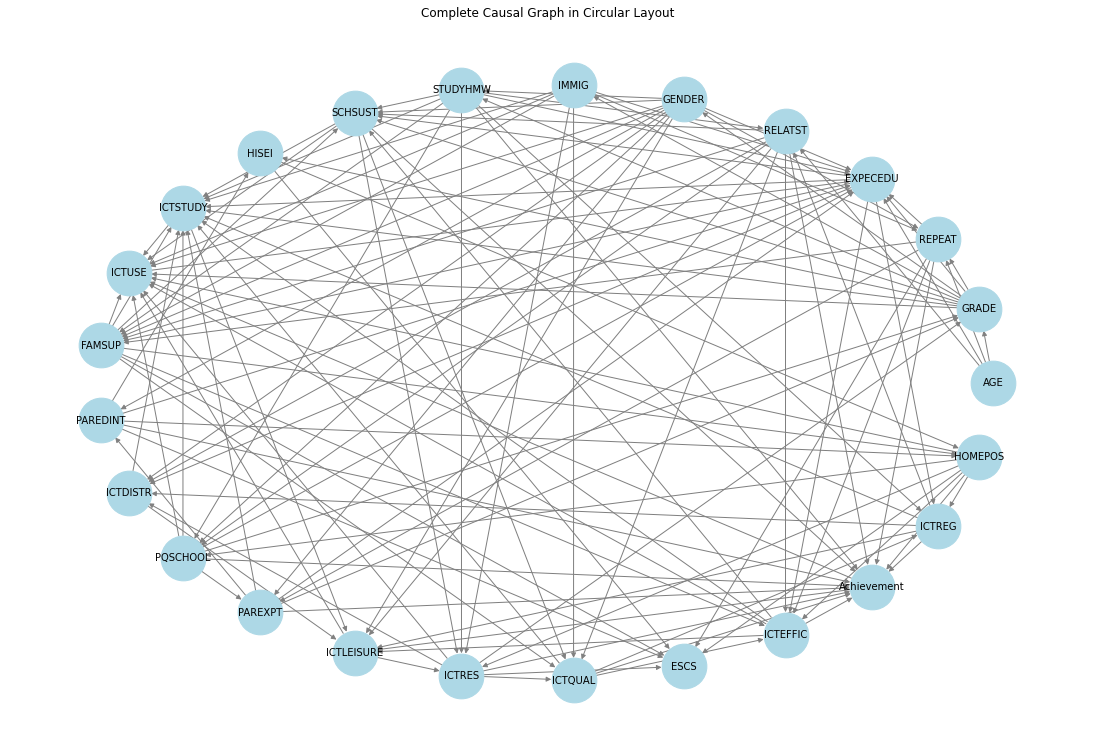

In [9]:
def create_and_draw_graph_from_edgelist_circular(file_path):
    G = nx.DiGraph()  # 创建一个有向图
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split(' ', 2)  # 使用空格分割每一行，最多分割成3部分
            if len(parts) == 3:  # 确保行格式正确
                source = parts[0]
                target = parts[1]
                # 直接添加边，这里忽略权重
                G.add_edge(source, target)
    
    # 使用circular_layout生成布局并绘制图
    pos = nx.circular_layout(G)  # 使用circular布局
    plt.figure(figsize=(15, 10))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10, width=1)
    plt.title("Complete Causal Graph in Circular Layout")

    # 保存图形为高清大图
    plt.savefig(result_path, format='png', dpi=300, bbox_inches='tight')
    plt.show()


create_and_draw_graph_from_edgelist_circular(file_path)